# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.152016e+01     7.809590e+00
 * time: 0.004597902297973633
     1     2.880308e+01     4.829567e+00
 * time: 0.02112579345703125
     2     2.231794e+01     6.724668e+00
 * time: 0.04118800163269043
     3     1.635260e+01     5.310804e+00
 * time: 0.06142091751098633
     4     1.213344e+01     1.563480e+00
 * time: 0.08131980895996094
     5     1.001735e+01     9.161155e-01
 * time: 0.1020050048828125
     6     9.379066e+00     1.254175e+00
 * time: 0.11876296997070312
     7     8.957280e+00     8.095885e-01
 * time: 0.13530778884887695
     8     8.630938e+00     6.977734e-01
 * time: 0.23760390281677246
     9     8.419601e+00     6.189223e-01
 * time: 0.25318384170532227
    10     8.298527e+00     5.159803e-01
 * time: 0.26865196228027344
    11     8.189518e+00     5.745088e-01
 * time: 0.28427886962890625
    12     8.089739e+00     4.020654e-01
 * time: 0.29974889755249023
    13     8.079506e+00     7.417252e-01
 * time:

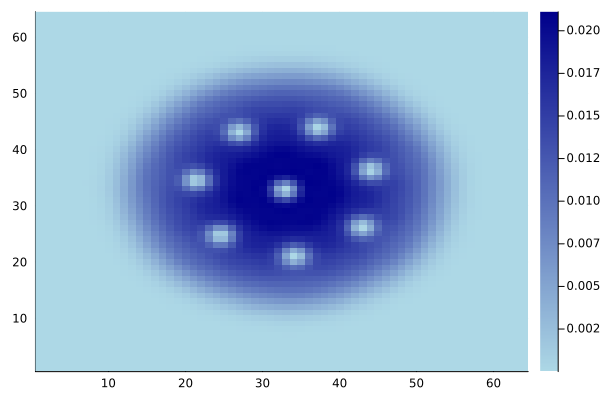

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)